In [ ]:
import tensorflow as tf
#import keras
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv('https://firebasestorage.googleapis.com/v0/b/asl202020202030.appspot.com/o/sign_mnist_train.csv?alt=media&token=f27b368a-64cc-4081-849d-927f08f60e07')
train_data

In [ ]:
y_train= train_data['label'].values
#len(set(y_train))
y_train.shape

(27455,)

In [ ]:
train_data.drop("label",inplace=True,axis=1)

In [ ]:
train_data

In [ ]:
x_train=train_data.values
x_train.shape

(27455, 784)

In [ ]:
test_data = pd.read_csv('https://firebasestorage.googleapis.com/v0/b/asl202020202030.appspot.com/o/sign_mnist_test.csv?alt=media&token=300f40d5-d39e-4df3-b43f-87ba5cc4d21c')

In [ ]:
test_data

In [ ]:
y_test= test_data['label'].values

In [ ]:
test_data.drop("label",inplace=True,axis=1)

In [ ]:
x_test=test_data.values
x_test.shape

(7172, 784)

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x=y_train)

In [ ]:
#reshape images
images=x_train
images = np.array([np.reshape(i, (28,28)) for i in x_train])
images = np.array([i.flatten() for i in images])

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
y_train = label_binrizer.fit_transform(y_train)

In [ ]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
len(y_train[0]), y_train.shape

(24, (27455, 24))

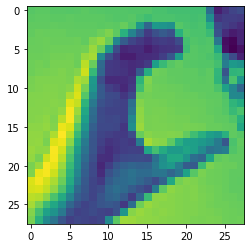

In [ ]:
#OPTIONAL
#inspect image
index = 2
y_train[index]
plt.imshow(images[index].reshape(28,28))

In [ ]:
x_train=images

In [ ]:
x_train.shape, y_train.shape, images.shape

((27455, 784), (27455, 24), (27455, 784))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, y_train, test_size=0.3, random_state=101)

In [ ]:
batch_size=128
num_classes = 24
epochs=10

In [ ]:
#normalise 
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
#reshape to fit into keras and tf
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

#plt.imshow(x_train[100].reshape(28,28))

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.20))
model.add(Dense(num_classes,activation='softmax'))

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.optimizers import Adam 
#from tensorflow.keras import backend as keras
#from keras.models import load_model

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
y_train.shape, x_train.shape, x_test.shape, y_test.shape

((19218, 24), (19218, 28, 28, 1), (8237, 28, 28, 1), (8237, 24))

In [ ]:
y_train

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_train,y_train),  epochs=epochs, batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 16s 101ms/step - loss: 1.9817 - accuracy: 0.4072 - val_loss: 0.9028 - val_accuracy: 0.6926
Epoch 2/10
151/151 [==============================] - 15s 100ms/step - loss: 0.5608 - accuracy: 0.8220 - val_loss: 0.3580 - val_accuracy: 0.8797
Epoch 3/10
151/151 [==============================] - 15s 101ms/step - loss: 0.2339 - accuracy: 0.9299 - val_loss: 0.1401 - val_accuracy: 0.9651
Epoch 4/10
151/151 [==============================] - 15s 101ms/step - loss: 0.1017 - accuracy: 0.9749 - val_loss: 0.1042 - val_accuracy: 0.9689
Epoch 5/10
151/151 [==============================] - 15s 101ms/step - loss: 0.0539 - accuracy: 0.9884 - val_loss: 0.0391 - val_accuracy: 0.9934
Epoch 6/10
151/151 [==============================] - 15s 101ms/step - loss: 0.0247 - accuracy: 0.9966 - val_loss: 0.0166 - val_accuracy: 0.9979
Epoch 7/10
151/151 [==============================] - 15s 101ms/step - loss: 0.0121 - accuracy: 0.9990 - val_loss: 0.0222 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

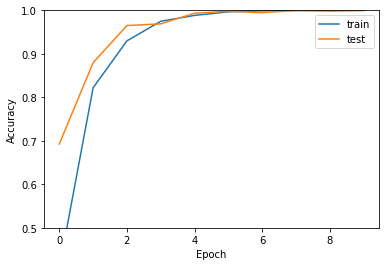

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(['train','test'])
plt.show()
#test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

In [ ]:
test_data = pd.read_csv('https://firebasestorage.googleapis.com/v0/b/asl202020202030.appspot.com/o/sign_mnist_test.csv?alt=media&token=300f40d5-d39e-4df3-b43f-87ba5cc4d21c')
y_test= test_data['label'].values
test_data.drop("label",inplace=True,axis=1)
x_test=test_data.values

In [ ]:
#evaluate it on unseen data 
x_test = np.array([np.reshape(i, (28,28)) for i in x_test])
x_test = np.array([i.flatten() for i in x_test])

y_test = label_binrizer.fit_transform(y_test)

x_test = x_test.reshape(x_test.shape[0], 28,28,1)
x_test.shape
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred.round())

0.8593139988845511